## Data Loading:

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
dataset=pd.read_csv('Major_Crime_Indicators_Open_Data.csv')
# keeping original data in dataset and coping data in dataframe data
data=dataset[:]
data.head()

,X,Y,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,...,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84
0,-79.425896,43.757346,1,GO-20141262074,2014/01/01 05:00:00+00,1998/06/01 04:00:00+00,2014,January,1,1,...,1480,110,Administering Noxious Thing,Assault,38,Lansing-Westgate,38,Lansing-Westgate (38),-79.425896,43.757346
1,-79.350229,43.646293,2,GO-20141260701,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2120,200,B&E,Break and Enter,70,South Riverdale,70,South Riverdale (70),-79.350229,43.646293
2,-79.376497,43.666423,3,GO-20141260889,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,74,North St.James Town,74,North St.James Town (74),-79.376497,43.666423
3,-85.488744,0.000000,4,GO-20141260973,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,2130,210,Theft Over,Theft Over,NSA,NSA,NSA,NSA,-85.488744,0.000000
4,-79.344839,43.678946,5,GO-20141261050,2014/01/01 05:00:00+00,2014/01/01 05:00:00+00,2014,January,1,1,...,1430,100,Assault,Assault,69,Blake-Jones,66,Danforth (66),-79.344839,43.678946


## Data Cleaning:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323296 entries, 0 to 323295
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   X                  323296 non-null  float64
 1   Y                  323296 non-null  float64
 2   OBJECTID           323296 non-null  int64  
 3   EVENT_UNIQUE_ID    323296 non-null  object 
 4   REPORT_DATE        323296 non-null  object 
 5   OCC_DATE           323296 non-null  object 
 6   REPORT_YEAR        323296 non-null  int64  
 7   REPORT_MONTH       323296 non-null  object 
 8   REPORT_DAY         323296 non-null  int64  
 9   REPORT_DOY         323296 non-null  int64  
 10  REPORT_DOW         323296 non-null  object 
 11  REPORT_HOUR        323296 non-null  int64  
 12  OCC_YEAR           323191 non-null  float64
 13  OCC_MONTH          323191 non-null  object 
 14  OCC_DAY            323191 non-null  float64
 15  OCC_DOY            323191 non-null  float64
 16  OC

In [4]:
# changing character values in an integer column as empty or NaN
data['HOOD_158'] = pd.to_numeric(data['HOOD_158'], errors='coerce')
# changing datatypes from float to int
data['OCC_YEAR']=pd.to_numeric(data['OCC_YEAR'], errors='coerce')
data['OCC_DAY']=pd.to_numeric(data['OCC_DAY'], errors='coerce')
data['HOOD_158']=pd.to_numeric(data['HOOD_158'], errors='coerce')

In [5]:
# # converting to proper format
# data['REPORT_DATE']=pd.to_datetime(data['REPORT_DATE'])
# data['OCC_DATE']=pd.to_datetime(data['OCC_DATE'])

# REPORT_YEAR          0
# REPORT_MONTH         0
# REPORT_DAY           0
# REPORT_HOUR          0
# OCC_YEAR             0
# OCC_MONTH            0
# OCC_DAY              0
# OCC_HOUR

In [6]:
# data.info()

In [7]:
data = data.drop(['X', 'Y','OBJECTID','EVENT_UNIQUE_ID','REPORT_DOY','OCC_DOY','UCR_CODE',
       'UCR_EXT', 'HOOD_140', 'NEIGHBOURHOOD_140','REPORT_DATE','OCC_DATE','LOCATION_TYPE'],axis=1)
data.head()

,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
0,2014,January,1,Wednesday,12,NaN,NaN,NaN,NaN,12,D32,Apartment,Administering Noxious Thing,Assault,38.0,Lansing-Westgate,-79.425896,43.757346
1,2014,January,1,Wednesday,3,2014.0,January,1.0,Wednesday,3,D51,Commercial,B&E,Break and Enter,70.0,South Riverdale,-79.350229,43.646293
2,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D51,Apartment,Assault,Assault,74.0,North St.James Town,-79.376497,43.666423
3,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,NSA,Outside,Theft Over,Theft Over,NaN,NSA,-85.488744,0.000000
4,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D54,Outside,Assault,Assault,69.0,Blake-Jones,-79.344839,43.678946


In [8]:
# METADATA

# Column	Description
# _id	
# Unique row identifier for Open Data database

# EVENT_UNIQUE_ID	
# Offence Number

# REPORT_DATE	
# Date Offence was Reported

# OCC_DATE	
# Date of Offence

# REPORT_YEAR	
# Year Offence was Reported

# REPORT_MONTH	
# Month Offence was Reported

# REPORT_DAY	
# Day of the Month Offence was Reported

# REPORT_DOY	
# Day of the Year Offence was Reported

# REPORT_DOW	
# Day of the Week Offence was Reported

# REPORT_HOUR	
# Hour Offence was Reported

# OCC_YEAR	
# Year Offence Occurred

# OCC_MONTH	
# Month Offence Occurred

# OCC_DAY	
# Day of the Month Offence Occurred

# OCC_DOY	
# Day of the Year Offence Occurred

# OCC_DOW	
# Day of the Week Offence Occurred

# OCC_HOUR	
# Hour Offence Occurred

# DIVISION	
# Police Division where Offence Occurred

# LOCATION_TYPE	
# Location Type of Offence

# PREMISES_TYPE	
# Premises Type of Offence

# UCR_CODE	
# UCR Code for Offence

# UCR_EXT	
# UCR Extension for Offence

# OFFENCE	
# Title of Offence

# MCI_CATEGORY	
# MCI Category of Occurrence

# HOOD_158	
# Identifier of Neighbourhood using City of Toronto's new 158 neighbourhood structure

# NEIGHBOURHOOD_158	
# Name of Neighbourhood using City of Toronto's new 158 neighbourhood structure

# HOOD_140	
# Identifier of Neighbourhood using City of Toronto's old 140 neighbourhood structure

# NEIGHBOURHOOD_140	
# Name of Neighbourhood using City of Toronto's old 140 neighbourhood structure

In [9]:
data.duplicated().sum()

24207

In [10]:
data.drop_duplicates()

,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
0,2014,January,1,Wednesday,12,NaN,NaN,NaN,NaN,12,D32,Apartment,Administering Noxious Thing,Assault,38.0,Lansing-Westgate,-79.425896,43.757346
1,2014,January,1,Wednesday,3,2014.0,January,1.0,Wednesday,3,D51,Commercial,B&E,Break and Enter,70.0,South Riverdale,-79.350229,43.646293
2,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D51,Apartment,Assault,Assault,74.0,North St.James Town,-79.376497,43.666423
3,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,NSA,Outside,Theft Over,Theft Over,NaN,NSA,-85.488744,0.000000
4,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D54,Outside,Assault,Assault,69.0,Blake-Jones,-79.344839,43.678946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323291,2022,December,31,Saturday,10,2022.0,December,22.0,Thursday,8,D41,House,B&E W'Intent,Break and Enter,119.0,Wexford/Maryvale,-79.301740,43.736102
323292,2022,December,31,Saturday,3,2022.0,December,31.0,Saturday,3,D42,Commercial,B&E,Break and Enter,130.0,Milliken,-79.258639,43.828794
323293,2022,December,31,Saturday,10,2022.0,December,22.0,Thursday,16,D53,Apartment,Assault,Assault,102.0,Forest Hill North,-79.425645,43.701404
323294,2022,December,31,Saturday,4,2022.0,December,31.0,Saturday,4,D53,Commercial,Assault,Assault,98.0,Rosedale-Moore Park,-79.385170,43.672134


In [11]:
# finding the % of missing data
(data.isna().sum()/len(data))*100

REPORT_YEAR          0.000000
REPORT_MONTH         0.000000
REPORT_DAY           0.000000
REPORT_DOW           0.000000
REPORT_HOUR          0.000000
OCC_YEAR             0.032478
OCC_MONTH            0.032478
OCC_DAY              0.032478
OCC_DOW              0.032478
OCC_HOUR             0.000000
DIVISION             0.000000
PREMISES_TYPE        0.000000
OFFENCE              0.000000
MCI_CATEGORY         0.000000
HOOD_158             1.618950
NEIGHBOURHOOD_158    0.000000
LONG_WGS84           0.000000
LAT_WGS84            0.000000
dtype: float64

In [12]:
# finding columns which contain empty values less than threshold value
threshold=len(data)*0.05
cols_drop=data.columns[ (data.isna().sum()>0 ) & (data.isna().sum()<=threshold)]
cols_drop



Index(['OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOW', 'HOOD_158'], dtype='object')

In [13]:
# dropping the columns that has missing values less than threshold value
data=data.dropna(subset=cols_drop)

In [14]:
data.head()


,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOW,REPORT_HOUR,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_HOUR,DIVISION,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84
1,2014,January,1,Wednesday,3,2014.0,January,1.0,Wednesday,3,D51,Commercial,B&E,Break and Enter,70.0,South Riverdale,-79.350229,43.646293
2,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D51,Apartment,Assault,Assault,74.0,North St.James Town,-79.376497,43.666423
4,2014,January,1,Wednesday,4,2014.0,January,1.0,Wednesday,4,D54,Outside,Assault,Assault,69.0,Blake-Jones,-79.344839,43.678946
5,2014,January,1,Wednesday,2,2014.0,January,1.0,Wednesday,2,D52,Commercial,Assault Bodily Harm,Assault,164.0,Wellington Place,-79.391841,43.646639
6,2014,January,1,Wednesday,2,2014.0,January,1.0,Wednesday,1,D41,Commercial,B&E W'Intent,Break and Enter,126.0,Dorset Park,-79.281075,43.765796


In [15]:
data.isna().sum()

REPORT_YEAR          0
REPORT_MONTH         0
REPORT_DAY           0
REPORT_DOW           0
REPORT_HOUR          0
OCC_YEAR             0
OCC_MONTH            0
OCC_DAY              0
OCC_DOW              0
OCC_HOUR             0
DIVISION             0
PREMISES_TYPE        0
OFFENCE              0
MCI_CATEGORY         0
HOOD_158             0
NEIGHBOURHOOD_158    0
LONG_WGS84           0
LAT_WGS84            0
dtype: int64

In [16]:
# data.select_dtypes('float').head()

In [17]:
# Define the conditions for each season
months = [
    (data['OCC_MONTH'].isin(['March','April','May'])),  # Spring (March to May)
    (data['OCC_MONTH'].isin(['June','July','August'])),  # Summer (June to August)
    (data['OCC_MONTH'].isin(['September','October','November'])),  # Fall (September to November)
    (data['OCC_MONTH'].isin(['December','January','February']))  # Winter (December to February)
]

# Define the corresponding season labels
season_type = ['Spring', 'Summer', 'Fall', 'Winter']

# Create a new 'season' column based on the conditions
data["season"] = np.select(months, season_type, default="Other")


In [18]:
data['OCC_HOUR'].describe()

count    317968.000000
mean         12.598032
std           7.253668
min           0.000000
25%           7.000000
50%          14.000000
75%          19.000000
max          23.000000
Name: OCC_HOUR, dtype: float64

In [19]:
# Define the conditions for each part of the day
day_parts = [
    (data['OCC_HOUR'].between(6, 11,inclusive='both')),       # Morning (6:00 AM - 11:59 AM)
    (data['OCC_HOUR'].between(12, 16,inclusive='both')),      # Afternoon (12:00 PM - 4:59 PM)
    (data['OCC_HOUR'].between(17, 20,inclusive='both')),      # Evening (5:00 PM - 8:59 PM)
    (data['OCC_HOUR'].between(21, 23,inclusive='both')) | (data['OCC_HOUR'].between(0, 5,inclusive='both'))  # Night (9:00 PM - 5:59 AM next day)
]

# Define the corresponding labels for each part of the day
day_parts_labels = ['Morning', 'Afternoon', 'Evening', 'Night']

# Create a new 'day_part' column based on the conditions
data["day_parts"] = np.select(day_parts, day_parts_labels, default="Other")
# data["day_parts"].unique()


In [20]:
crime_year=pd.crosstab(data['REPORT_YEAR'],data['MCI_CATEGORY'])
crime_year

MCI_CATEGORY,Assault,Auto Theft,Break and Enter,Robbery,Theft Over
REPORT_YEAR,,,,,
2014,16514,3584,7185,3668,993
2015,17873,3261,6913,3471,1036
2016,18632,3307,6401,3656,1028
2017,18938,3573,6883,4008,1169
2018,19573,4775,7564,3622,1230
2019,20593,5281,8438,3510,1367
2020,17970,5721,6913,2774,1209
2021,19013,6537,5670,2243,1053
2022,21004,9485,6060,2822,1448


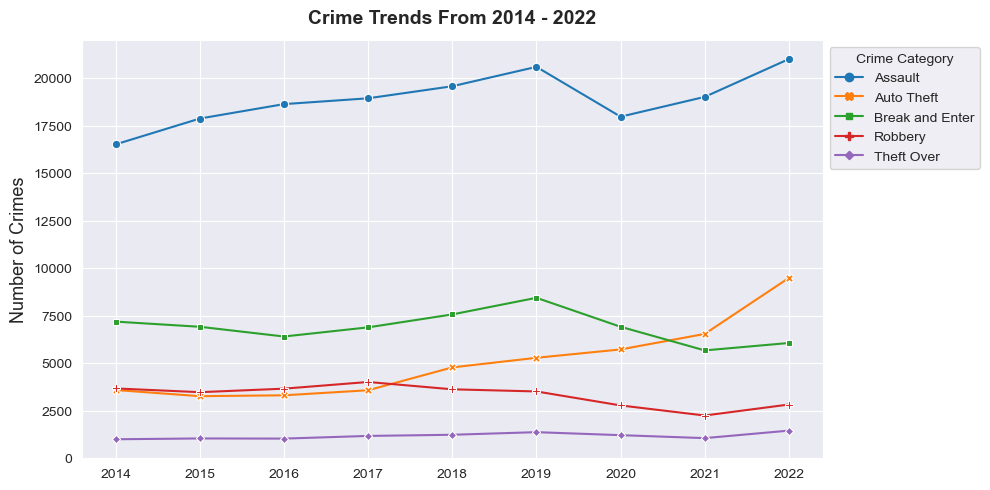

In [37]:
# Create a line plot using Seaborn
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")  
fig=sns.lineplot(data=crime_year, markers=True, palette='tab10',dashes=False)
plt.title('Crime Trends From 2014 - 2022',y=1.02,fontsize=14,fontweight='bold')
plt.xlabel('')
plt.ylabel('Number of Crimes',fontsize=13)
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Which is the most common Premises where crime ususally takes place?

In [22]:
crime_premise=data.groupby('PREMISES_TYPE').agg({'OFFENCE':'count'}).reset_index()
crime_premise

,PREMISES_TYPE,OFFENCE
0,Apartment,76153
1,Commercial,63784
2,Educational,8095
3,House,57500
4,Other,18887
5,Outside,84367
6,Transit,9182


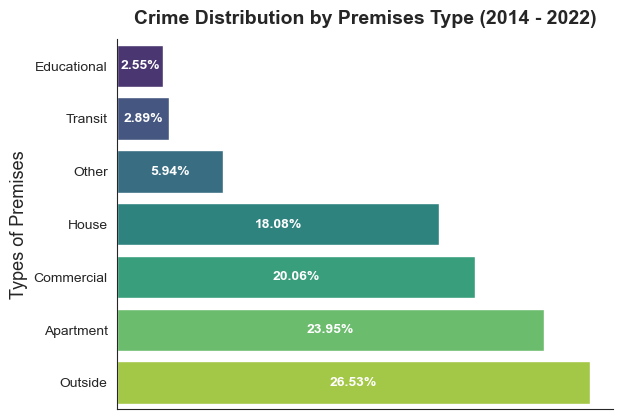

In [36]:
sns.set_style('white')
# Calculate the percentages
crime_premise['Percentage'] = ((crime_premise['OFFENCE'] / crime_premise['OFFENCE'].sum()) * 100)

# Sort the DataFrame by 'Percentage' in ascending order
crime_premise = crime_premise.sort_values(by='Percentage')

# Set the style
# sns.set_style('darkgrid')

# Create a bar plot
ax = sns.barplot(data=crime_premise, y='PREMISES_TYPE', x='Percentage', palette='viridis')

# Annotate the bars with their percentages
for p in ax.patches:
    percentage = p.get_width()
    ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=10, color='white',weight='bold')  # Adjust color and position

# Set the x-axis label
plt.xlabel('')
plt.xticks([])

# Set the y-axis label
plt.ylabel('Types of Premises',fontsize=13)

plt.title('Crime Distribution by Premises Type (2014 - 2022)',y=1.02,fontsize=14,fontweight='bold')
sns.despine()
# Show the plot
plt.show()


In [24]:
result = pd.crosstab(data['REPORT_YEAR'], data['day_parts'], values=data['MCI_CATEGORY'], aggfunc='count')
result = result.reset_index()
result = result.rename_axis(None, axis=1)
# result.describe().T
result

,REPORT_YEAR,Afternoon,Evening,Morning,Night
0,2014,7704,6705,5627,11908
1,2015,7579,6643,5798,12534
2,2016,7638,6942,5717,12727
3,2017,8230,7310,5761,13270
4,2018,8674,7673,6272,14145
5,2019,8921,7934,6905,15429
6,2020,7728,7766,5606,13487
7,2021,7841,7608,5488,13579
8,2022,8968,8559,6628,16664


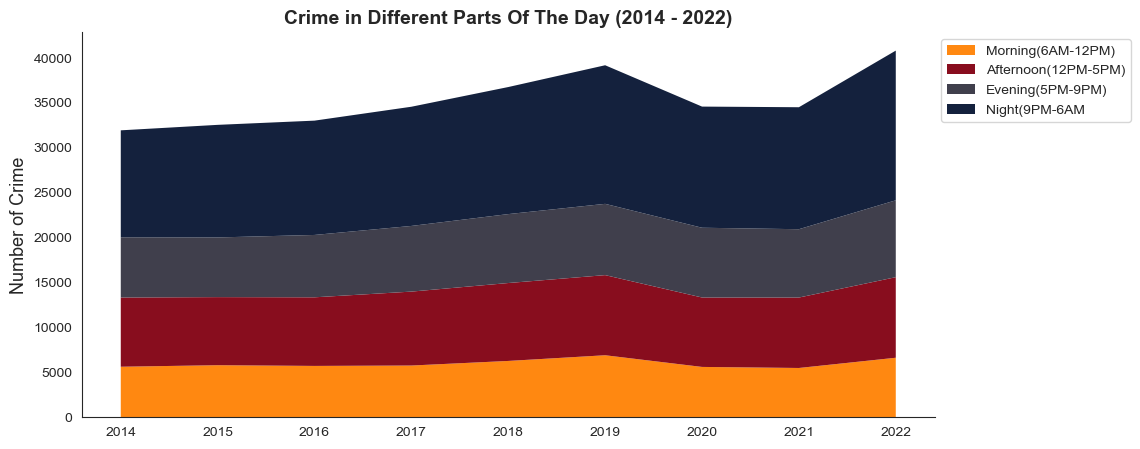

In [25]:
sns.set_style('white')
plt.figure(figsize=(11,5))
color=['#ff8811','#880d1e','#403f4c','#14213d']
plt.stackplot(result['REPORT_YEAR'],
              result['Morning'],
              result['Afternoon'],
              result['Evening'],
              result['Night'],
              edgecolor='none',
              colors=color
             )
label=['Morning(6AM-12PM)','Afternoon(12PM-5PM)','Evening(5PM-9PM)','Night(9PM-6AM']
plt.legend(labels=label,loc='upper left',bbox_to_anchor=(1,1))
plt.ylabel('Number of Crime',fontsize=13)
plt.title('Crime in Different Parts Of The Day (2014 - 2022)',fontsize=14,weight='bold')
sns.despine()
plt.show()

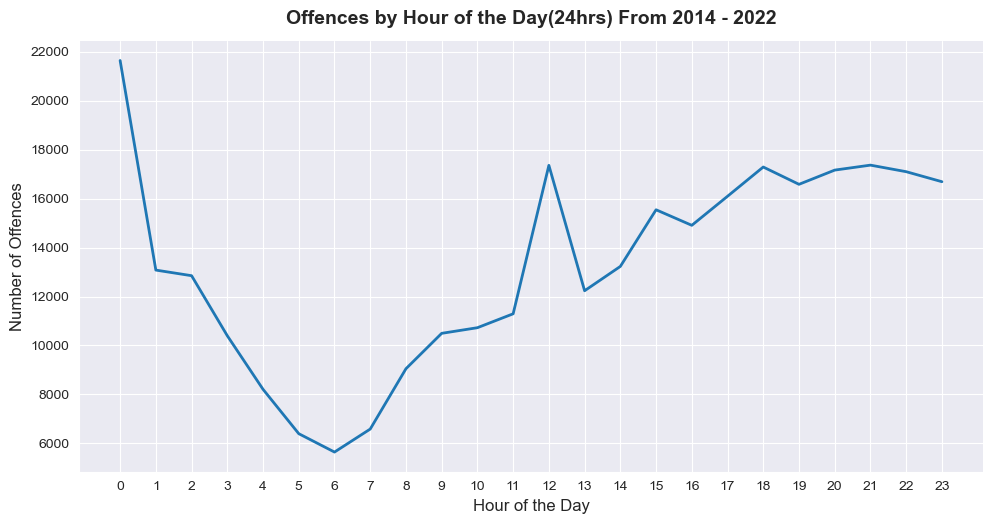

In [26]:
# count offence by each hour
offence_hour=data.groupby('OCC_HOUR')['OFFENCE'].count().reset_index()

# Set the style
sns.set_style('darkgrid')

# Create a line plot with custom style
sns.relplot(data=offence_hour, kind='line',x='OCC_HOUR',y='OFFENCE', aspect=2, markers=True,
            linewidth=2, markersize=8)

# Set the x-ticks to represent each hour of the day (0 to 23)
plt.xticks(np.arange(0,24,1))

# Set the x-axis label
plt.xlabel('Hour of the Day',fontsize=12)
plt.ylabel('Number of Offences',fontsize=12)

# Set the title
plt.title('Offences by Hour of the Day(24hrs) From 2014 - 2022',y=1.02,fontsize=14,fontweight='bold')

# Show the plot
plt.show()


In [27]:
# data.sample()

In [28]:
# data['HOOD_crime_per_year'].nunique()

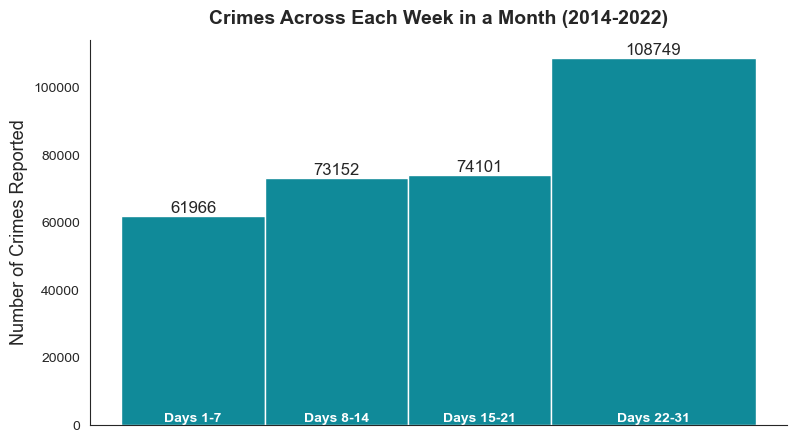

In [29]:
# Define custom bin edges (intervals) for 4 bins
bin_edges = [0, 7, 14, 21, 31]  # Adjusted for 4 bins

sns.set_style('white')
plt.figure(figsize=(9, 5))
hist_data, _, _ = plt.hist(data['REPORT_DAY'], bins=bin_edges, color='#108A99')

# Annotate each bar with its label (centered)
for i in range(len(hist_data)):
    x = (bin_edges[i] + bin_edges[i + 1]) / 2  # Calculate the center of the bar
    plt.text(x, hist_data[i], str(int(hist_data[i])), ha='center', va='bottom', fontsize=12)

    # Add interval labels below each bin's center
    plt.text(x, -5, f'Days {bin_edges[i] + 1}-{bin_edges[i + 1]}', ha='center', va='bottom',
             fontsize=10, color='white', weight='bold')

# Set labels and title
plt.xticks([])  # Remove x-axis ticks
plt.xlabel('')
plt.ylabel('Number of Crimes Reported', fontsize=13)
plt.title('Crimes Across Each Week in a Month (2014-2022)', y=1.02, fontsize=14, weight='bold')

# Show the plot
sns.despine()
plt.show()


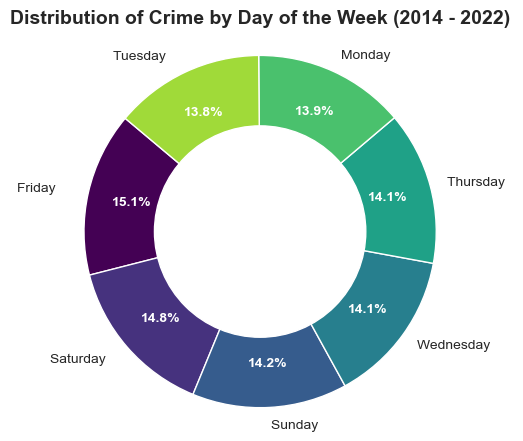

In [30]:
crime_DOW=data.groupby('OCC_DOW')['OFFENCE'].count().reset_index()
# crime_DOW

# Calculate percentages
crime_DOW['Percentage'] = (crime_DOW['OFFENCE'] / crime_DOW['OFFENCE'].sum()) * 100

# Sort the DataFrame by percentage in descending order
crime_DOW = crime_DOW.sort_values(by='Percentage', ascending=False).head(10)

# Create a Viridis colormap
cmap = plt.get_cmap('viridis')

# Create a pie chart with gradient colors based on the percentage
fig, ax = plt.subplots(figsize=(5, 5))
wedges, texts, autotexts = ax.pie(
    crime_DOW['Percentage'],
    labels=crime_DOW['OCC_DOW'],
    autopct='%1.1f%%',
    startangle=140,
    colors=[cmap(i / len(crime_DOW)) for i in range(len(crime_DOW))],
    pctdistance=0.75,
)

# Draw a white circle at the center to create a donut-like chart
center_circle = plt.Circle((0, 0), 0.60, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Set percentage labels to white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    
# Set title
plt.title('Distribution of Crime by Day of the Week (2014 - 2022)',y=1.02,fontsize=14,weight='bold')

# Show the donut chart
plt.show()

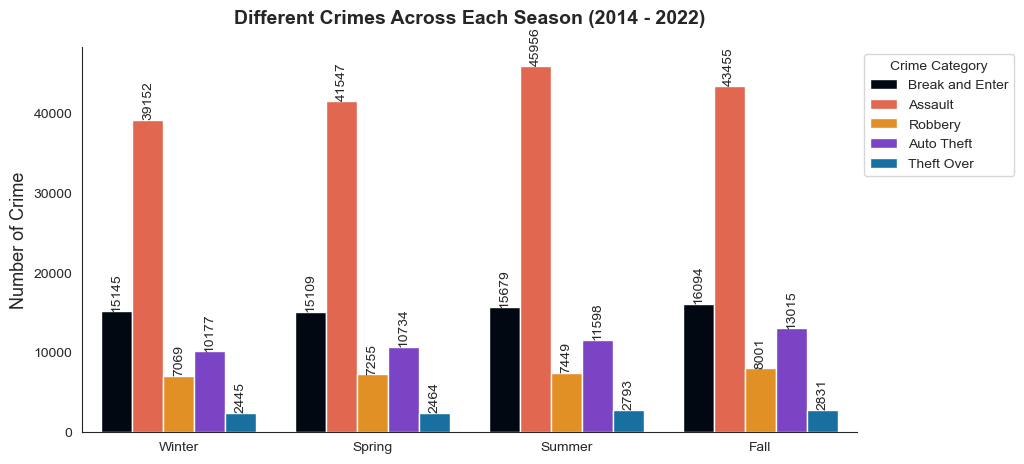

In [31]:
# Set the style
sns.set_style('white')

# Create a figure with a specific figsize
fig, ax = plt.subplots(figsize=(10, 5))  # Adjust the width and height as needed

# Define custom colors for each 'MCI_CATEGORY'
custom_colors = {'Break and Enter': '#000814', 'Assault': '#f95738', 'Robbery': '#ff9505',
                 'Auto Theft': '#772fda','Theft Over':'#0077b6'}

# Create the countplot with custom colors and specify the 'ax' parameter
sns.countplot(data=data, x='season', hue='MCI_CATEGORY', palette=custom_colors, ax=ax)

# Add text labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', rotation=90, fontsize=10)

# Add legend
plt.legend(title='Crime Category', loc='upper left', bbox_to_anchor=(1, 1))

# Set figure title and labels
plt.title('Different Crimes Across Each Season (2014 - 2022)', y=1.04, fontsize=14, weight='bold')
plt.xlabel('')
plt.ylabel('Number of Crime',fontsize=13)
sns.despine()

# Show the plot
plt.show()


### Top 50 Locations where Maximum Crime Occured between 2014 - 2022:


In [32]:
# counting no of crimes in each neighbourhood every year
HOOD_crime_per_year = data.groupby(['REPORT_YEAR', 'NEIGHBOURHOOD_158'])['OFFENCE'].count().reset_index()
# HOOD_crime_per_year[HOOD_crime_per_year['NEIGHBOURHOOD_158']=='West Humber-Clairville']
high_crime_area=HOOD_crime_per_year.groupby('NEIGHBOURHOOD_158')['OFFENCE'].sum().sort_values(ascending=False)
high_crime_area.reset_index().head()

,NEIGHBOURHOOD_158,OFFENCE
0,West Humber-Clairville,8803
1,Moss Park,7746
2,Downtown Yonge East,6840
3,Yonge-Bay Corridor,6495
4,Wellington Place,6236


In [33]:
area=data[['NEIGHBOURHOOD_158','LONG_WGS84','LAT_WGS84']]

# Merge 'high_crime_area' with 'area' using a left join
merged_df = pd.merge(high_crime_area, area, how='left', on='NEIGHBOURHOOD_158')

# Drop duplicates based on the 'NEIGHBOURHOOD_158' column, keeping only the first occurrence
merged_df = merged_df.drop_duplicates(subset='NEIGHBOURHOOD_158', keep='first')

# Now 'merged_df' contains one record for each neighborhood
crime_location = merged_df.sort_values(by='OFFENCE',ascending=False).head(50)
# crime_location

In [34]:
import folium

# Create a map centered at a location (e.g., Toronto)
m = folium.Map(location=[43.70, -79.40], zoom_start=11)  # Adjust center and zoom as needed

# Iterate through the rows of the merged dataframe
for index, row in crime_location.iterrows():
    neighborhood = row['NEIGHBOURHOOD_158']
    longitude = row['LONG_WGS84']
    latitude = row['LAT_WGS84']
    offense_count = row['OFFENCE']

    # Create a marker for each neighborhood
    marker = folium.Marker([latitude, longitude], tooltip=f'{neighborhood}: {offense_count} offenses')
    marker.add_to(m)

# Display the map
m

C:\Users\iamsuzank\AppData\Local\Temp\ipykernel_6500\1424757830.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


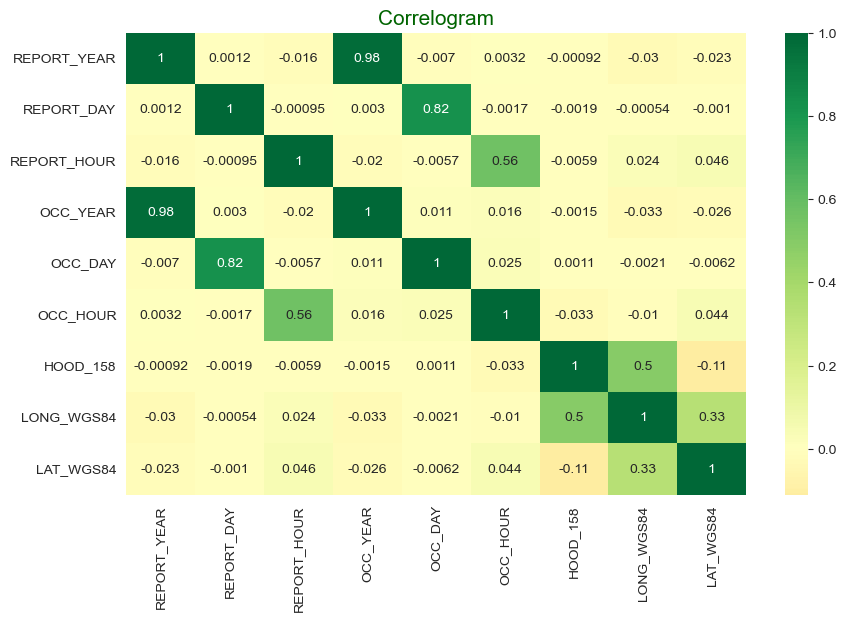

In [35]:
corr = data.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()